In [1]:
import numpy as np
import pandas as pd
import pickle
import sys
import os

sys.path.append((os.path.dirname(os.path.realpath('../lhs'))))
sys.path.append((os.path.dirname(os.path.realpath('../spatial_plot'))))

import lhs
import spatial_plot
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('../emit_data')
print(df.shape)
df.head()

(22886, 13)


,elev med,zen,slope,wv range,wv med,total cloud fraction,lat,lon,fid,date,time,orbit,scene
0,3.22,36.97,7.65,4.78,1.52,0.10,90.483704,37.149964,emit20220810t034648_o22203_s001,20220810,034648,22203,001
1,2.23,36.66,3.77,0.66,1.79,0.02,91.182553,37.631332,emit20220810t034700_o22203_s001,20220810,034700,22203,001
2,2.06,36.37,1.51,0.40,1.71,0.03,91.891301,38.106329,emit20220810t034712_o22203_s001,20220810,034712,22203,001
3,2.08,36.08,2.58,1.04,1.64,0.03,92.610548,38.577816,emit20220810t034724_o22203_s001,20220810,034724,22203,001
4,2.31,35.81,14.88,4.74,1.81,0.00,93.339586,39.044287,emit20220810t034735_o22203_s001,20220810,034735,22203,001


In [3]:
samples = lhs.LatinHypercubeSample3(df)
lhs_samples = df.iloc[samples]
lhs_fids = lhs_samples['fid']
print(lhs_samples.shape)
lhs_samples.head()

num samples to build: 36
(33, 13)


,elev med,zen,slope,wv range,wv med,total cloud fraction,lat,lon,fid,date,time,orbit,scene
17844,0.82,7.63,8.71,2.89,1.50,0.45,69.591690,29.471152,emit20230602t071421_o15305_s000,20230602,071421,15305,000
20495,0.15,19.27,2.07,0.42,2.28,0.03,-100.741311,42.877376,emit20230619t184710_o17012_s001,20230619,184710,17012,001
7384,0.25,33.94,9.01,0.14,0.57,0.00,44.436245,17.493308,emit20230220t103144_o05107_s003,20230220,103144,05107,003
13294,0.20,43.38,5.06,0.34,0.59,0.14,4.921935,23.865350,emit20230408t085415_o09806_s000,20230408,085415,09806,000
4180,0.76,54.11,12.33,0.23,0.55,0.01,16.827972,20.674238,emit20230123t133034_o02309_s000,20230123,133034,02309,000


C:\Users\vpatro\Desktop\scene_analysis\spatial_plot.py:41: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


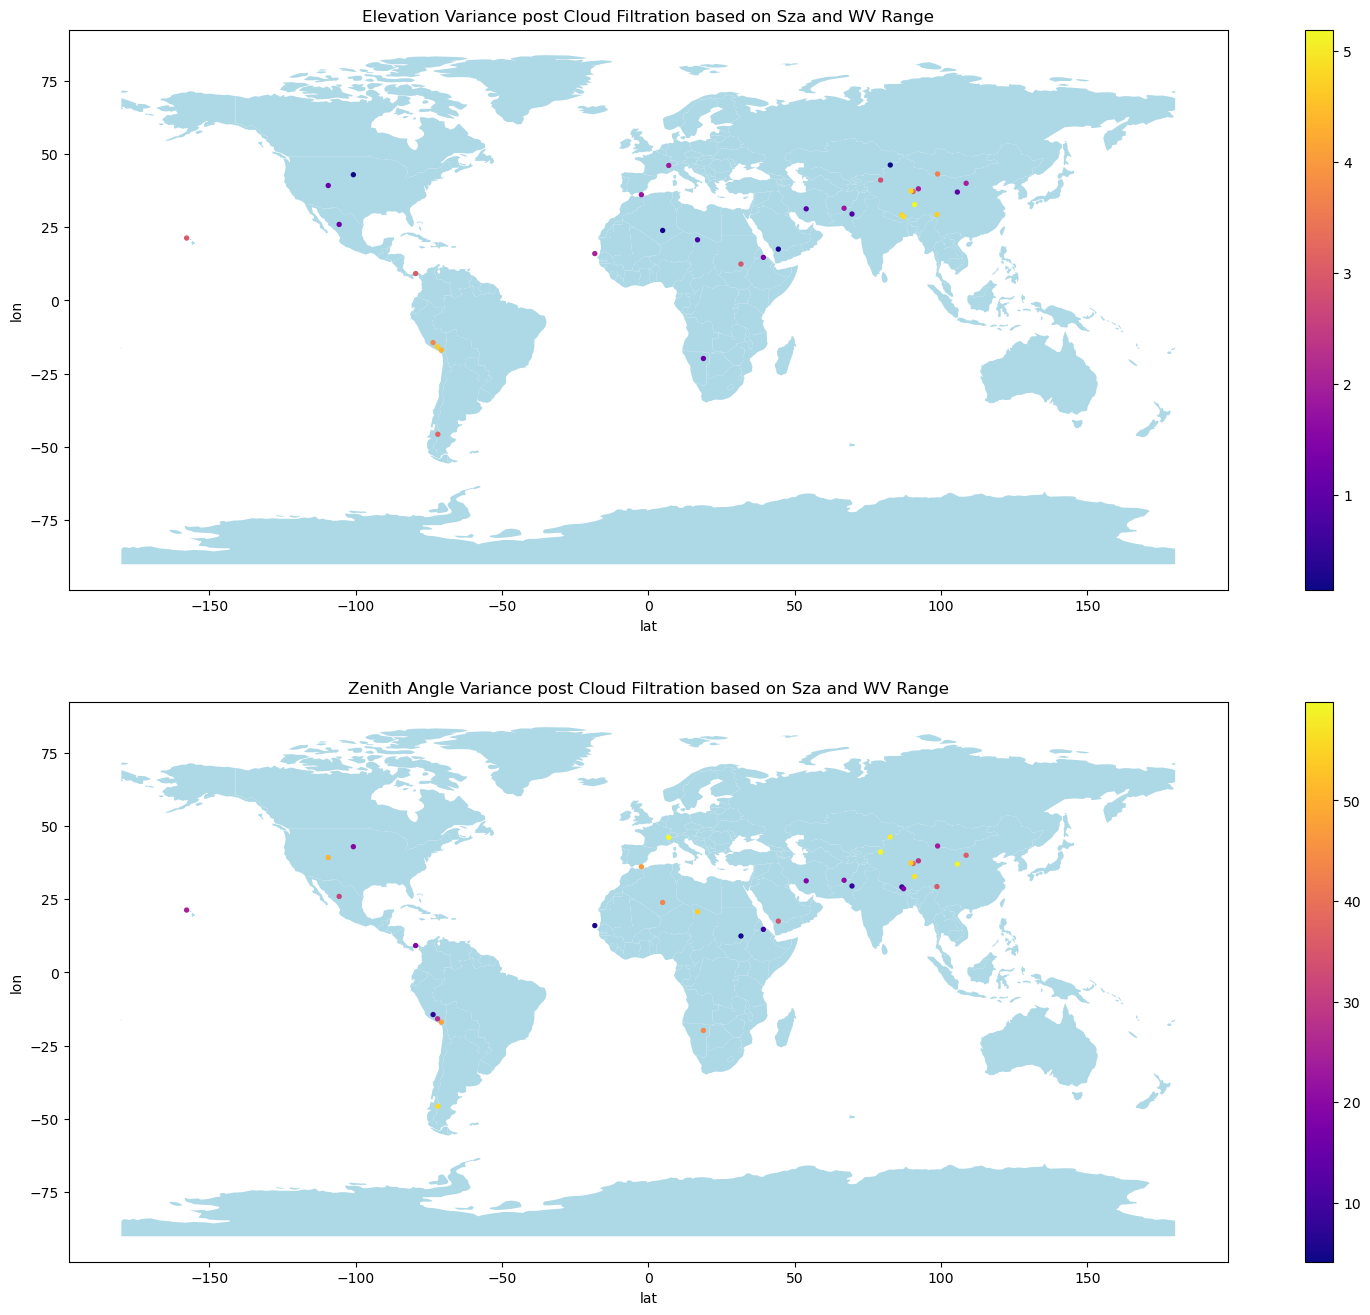

In [4]:
spatial_plot.elev_zen_variance_plt(lhs_samples, ' Sza and WV Range')

C:\Users\vpatro\Desktop\scene_analysis\spatial_plot.py:55: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


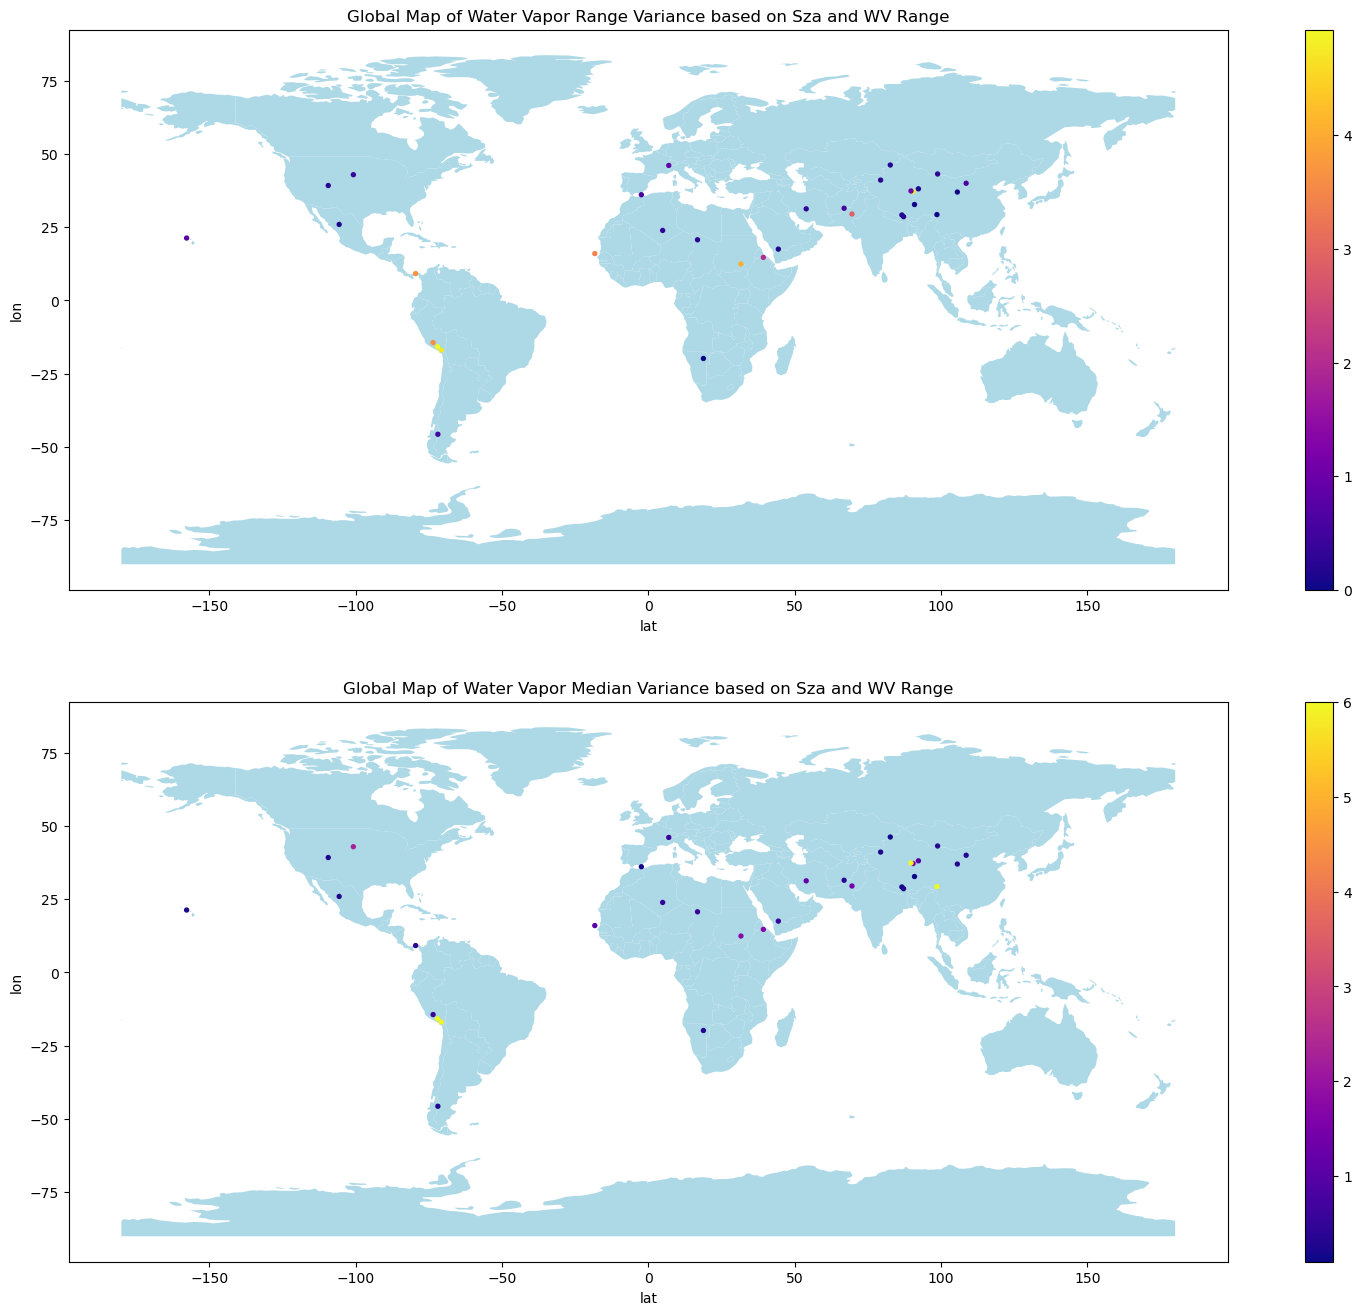

In [5]:
spatial_plot.wv_range_med_variance_plt(lhs_samples, ' Sza and WV Range')

In [9]:
np.savetxt('../predicted_wv_masks/lhs_sza_elev_33/lhs_33_fids.txt', lhs_fids, fmt='%s')

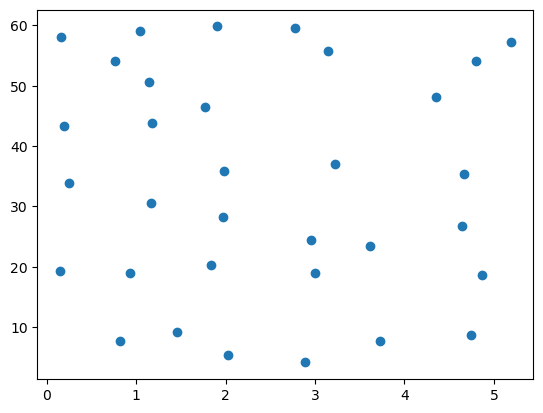

In [10]:
plt.scatter(lhs_samples['zen'], lhs_samples['elev med'])
plt.title('Distribution of LHS Samples')
plt.xlabel('Elevation Median (km)')
plt.ylabel('')